# US Automobile Accidents 2018 to March 2023 - A Technical Report and Analysis 

### By: Melissa Short
### Elan Wilkinson
### Parker Christenson

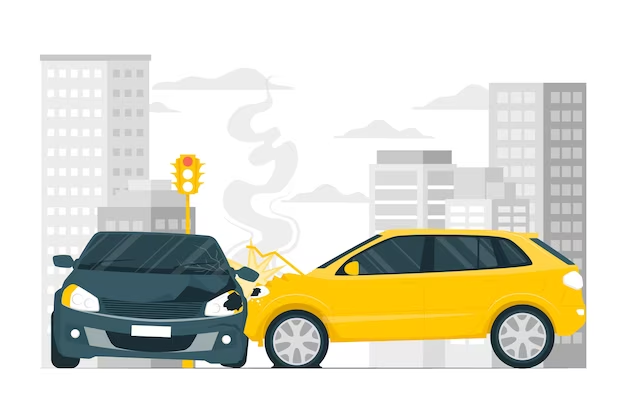



# Section 1: Introduction 

### `Background`

This data set came from kaggle.com, and is a collection of large list of Automobile Crashes ranked from 1-4 in severity. This data set includes lots of features, and will help us create a predicition model to predict the severity of a crash. This data set is very large, and has over 3 million rows of data, which as a group we have decided to scale down due to the computational power needed in the classification model. 

### `Problem`

In this technical report we will be looking at the data set and trying to be able to predict the severity of car accidents that occur in the United States. We will be using a classification model to predict the severity of the accident. We will be using the features in the data set to help us predict the severity of the accident, and during that we will be giving some insights on the data, and the features that we are using.

### `Interest`

An Insurance company would want to know, which cities and or states have the highest and lowest accidents so they can adjust their rates accordingly. They would also want to know what features are the most important in predicting the severity of the accident. This would help them adjust their rates accordingly. With that being said, this data set does not provide, who was at fault for the accident, it is just a classification of the incident that occured. 

# Section 2: Data Acquisition and Cleaning

### `Libraries used in this project:` 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import plotly.graph_objects as go
import scipy.stats as stats

In [6]:
# From csv to pd dataframe
df = pd.read_csv(r'C:\Users\user\Desktop\School\MSAAI_500\Group_Project\US_Accidents_March23.csv')

# col change 
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# filtering out data before 2018
df_filtered = df[df['Start_Time'].dt.year >= 2018]

# sorting by time 
df_sorted = df_filtered.sort_values(by='Start_Time')

# changing the df ref name 
df = df_sorted

#### `Getting All of the Column Names in the Data Set`

In [7]:
column_names_list = df.columns.values.tolist()
column_names_list

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

#### `Data Columns and Their Descriptions`

ID: The ID of the accident, unique key.
 
Source: Pulled from two diffrerent sources 

Severity: On a scale of 1-4, how severe the accident was at the time of recording, four being the most severe. 

Start_Time: Date the accident took place, in the format of YYYY-MM-DD HH:MM:SS (We have filtered out any dates that are older than 2018)

End_Time: Date the accident ended, in the format of YYYY-MM-DD HH:MM:SS

Start_Lat: Latitude of the accident from inital impact

Start_Lng: Longitude of the accident from inital impact

End_Lat: Latitude of the accident from ending place of the vehicle 

End_Lng: Longitude of the accident from ending place of the vehicle

Distance(mi): distance in miles that the accident occured from the starting point

Description: Description of the accident and the incident that occured 

Street: Street name of the accident

City: City name of the accident

County: County name of the accident

State: State name of the accident (49 states are listed in this data set)

Zipcode: Zipcode that the accident Occured in

Country: Country of the Accident (All accidents that occured happened in the United States)

Timezone: Timezone of the accident

Airport_Code: The closest Airport to the accident

Weather_Timestamp: the time-stamp of weather observation

Temperature(F): Temperature in Fahrenheit

Wind_Chill(F): Wind chilld in Fahrenheit

Humidity(%): Shows the humidity (in percentage).

Pressure(in): Shows the air pressure (in inches).

Visibility(mi): Shows visibility (in miles).

Wind_Direction: Shows wind direction.

Wind_Speed(mph): Shows wind speed (in miles per hour).

Precipitation(in): Shows precipitation amount in inches, if there is any.

Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

Amenity: A POI annotation which indicates presence of amenity in a nearby location.

Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.

Crossing: A POI annotation which indicates presence of crossing in a nearby location.

Give_Way: A POI annotation which indicates presence of give_way in a nearby location.

Junction: A POI annotation which indicates presence of junction in a nearby location.

No_Exit: A POI annotation which indicates presence of no_exit in a nearby location.

Railway: A POI annotation which indicates presence of railway in a nearby location.

Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.

Station: A POI annotation which indicates presence of station in a nearby location.

Stop: A POI annotation which indicates presence of stop in a nearby location.

Traffic_Calming: A POI annotation which indicates presence of traffic_calming in a nearby location.

Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.

Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.

Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.

Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.

Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.

Astronomical_Twilight: hows the period of day (i.e. day or night) based on astronomical twilight.




#### `Droping Columns that are Blank or Not Needed for analysis`

In [20]:
# Columns to drop
columns_to_drop = ['County', 'Timezone', 'Airport_Code', 'Description', 'Street', 'Astronomical_Twilight', 'Civil_Twilight', 'Nautical_Twilight', 'Country']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df = df.drop(columns=existing_columns_to_drop)
#df_cols = df.columns.tolist()
#print(df_cols)

### Changing all of the Values that are True or False to 1 or 0 

In [22]:

# Define a function to convert boolean to integer
def convert_boolean(val):
    if isinstance(val, bool):
        return int(val)
    return val

# Apply the function to the entire DataFrame
df = df.applymap(convert_boolean)

# To verify the changes
#df.head()

### Dropping all rows with missing values

In [23]:
df = df.dropna()

print(df.shape)

(3551471, 37)


### Adding the Weekday, Month, Day, Hour, and Minute Columns to the Data Frame

#### `By doing some feature extraction, we are hoping that we are able to pull out some more relevant information from the data set and we are attempting to see if the week day, and time has any effect on the severity of the accident.`

In [24]:
# Cast Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

# Extract year, month, weekday and day
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day

# Extract hour and minute
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

#df.head()

# Section 3: Exploratory Data Analysis (EDA)

#### Correlation Matrix 

A correlation Matrix is used to show the correlation between all of the features in the data set. This is a good way to see if there are any features that are highly correlated with each other. On this example, we can see that there are spome features that are highly correlated with each other, but those are the features that are not going to be used in the model due to the fact that they are location based. With that being said, the deeper the red the higher the correlation. We are primarliy looking at the correlation between the severity and the other features, because that will give us the best idea of what features are the most important in predicting the severity of the accident.

C:\Users\user\AppData\Local\Temp\ipykernel_20172\876484934.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_Matrix = df.corr()


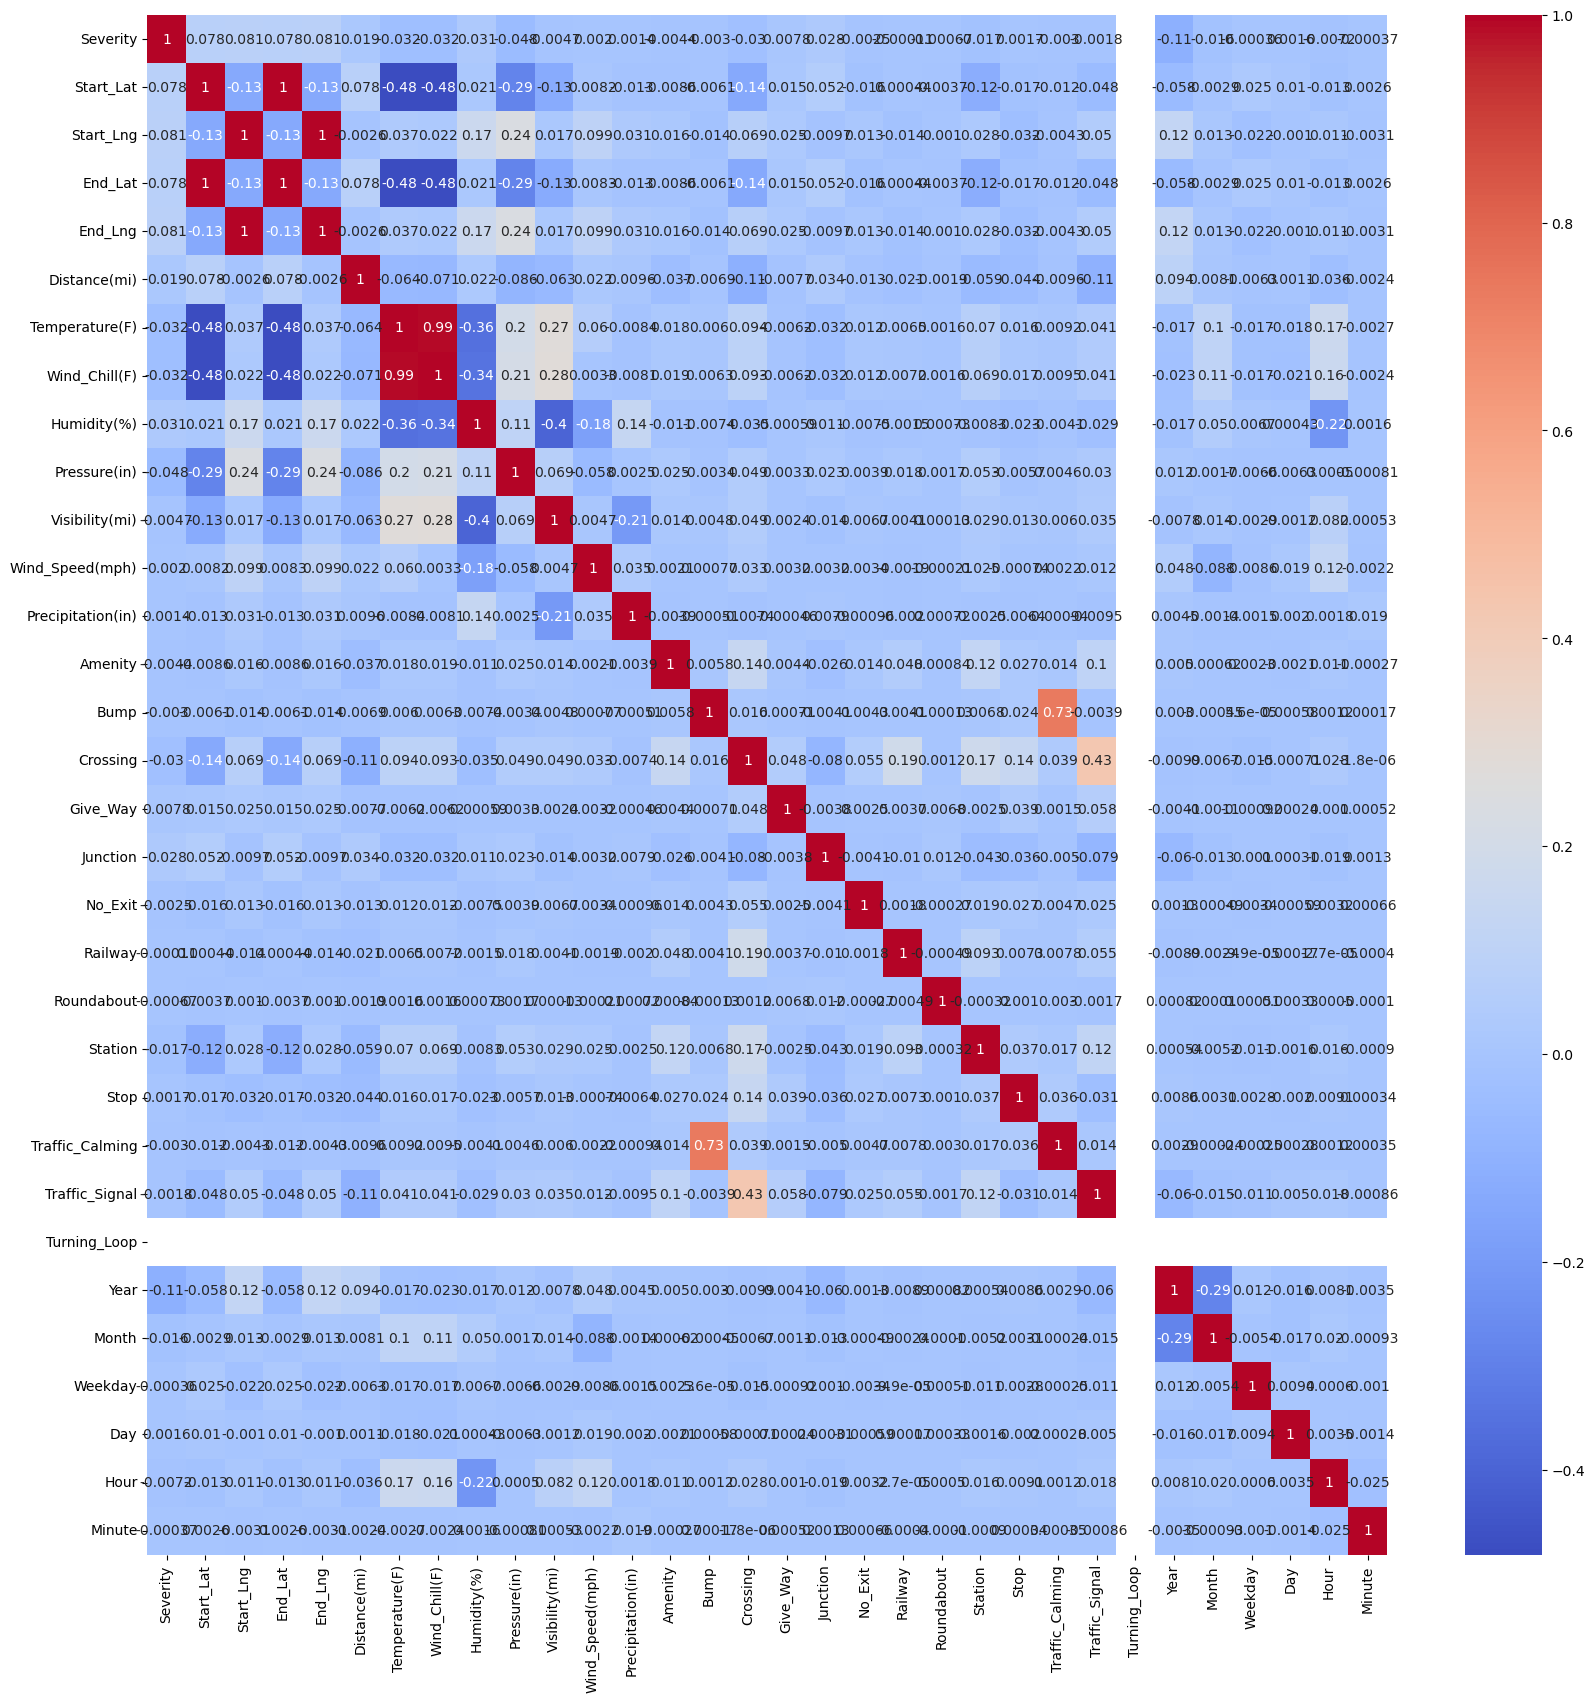

In [26]:
Correlation_Matrix = df.corr()

# Correlation Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm')
plt.show()

#### Pivot table to get the count of accidents by State and the Severity of Accident counts 

In [35]:
pivot_table = pd.pivot_table(df, index='State', columns='Severity', values='ID', aggfunc='count', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table

Severity,1,2,3,4,Total
State,,,,,
AL,114,25159,410,1152,26835
AR,11,16460,208,2022,18701
AZ,6195,64321,526,2233,73275
CA,4608,864589,5539,6638,881374
CO,513,25338,6047,4359,36257
CT,5,37902,792,2624,41323
DC,37,12751,251,520,13559
DE,7,5316,233,1048,6604
FL,2831,516850,4257,6246,530184


#### Pivot Tables Use Case 

In this particular case, we use a pivot table to get the overview of all of the states, and the severity of the accident. When making a pivot table, you are looking to pull or look at the data in a different way. In this case, we are looking at the count of accidents by state, and the severity of the accident. This is a good way to get a quick overview of the data, and see if there are any states that have a higher count of accidents, and if there are any states that have a higher count of severity 4 accidents. From this pivot table, we can see that there are some states that have a higher count of accidents, and some of the states don't reall have that many severity 4 accidents.

#### `Pivot Table Key Takeaways`

1. Hawaii is totally missing from this data set, which means that we are only missin one state, and we could not make an accurate predicition if an accident occured in Hawaii.
2. We notice that some of the states like Maine, South Dakota, and North Dakota have a very low count of accidents, and that could be due to the fact that there are not a lot of people that live in those states, and we would need to check for the populations of those states to verify. 
3. There seems to be a strong tendency to have a higher count of severity 2 accidents, and that could be due to the fact that there are more accidents that are not as severe as others.

### Interactive Map of Accidents by The State 

In [10]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of US Accidents for each State", geo_scope="usa")
fig.show()

#### `Interactive Map Key Takeaways`

The states that have a higher count of the accidents, are going to be a lighter shade, going to red, which would be the darkest color. With that being said, if you are in a coded enviorment, you will be able to hold and drag the map to be able to interact with it. This is a good way to see where the accidents are occuring, and if there are any states that have a higher count of accidents.

### Getting the top 20 Cities with the most accidents

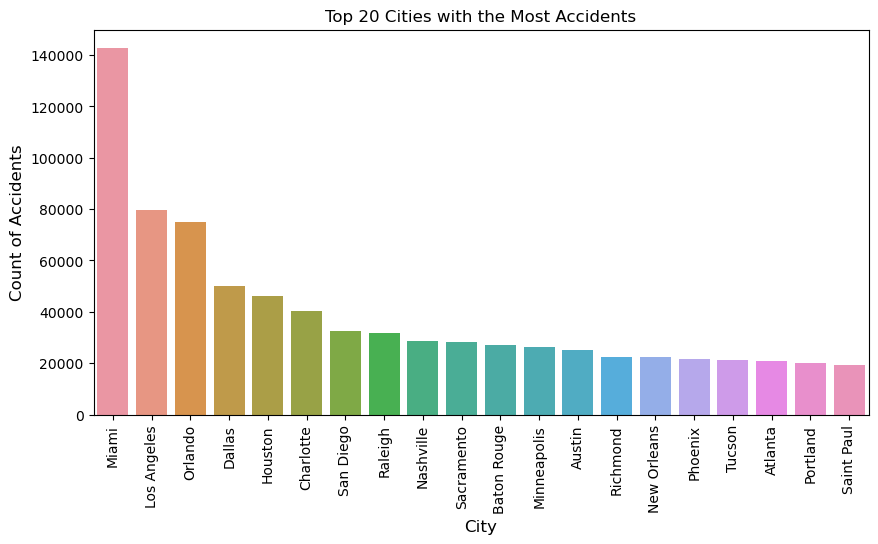

In [11]:
# Get the top 20 cities with the most accidents
city_accident_counts = df['City'].value_counts().head(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=city_accident_counts.index, y=city_accident_counts.values, alpha=1)
plt.title('Top 20 Cities with the Most Accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### `Top 20 Cities with the most accidents`

From this chart we are able to see that there are some cities that have a higher count of accidents than others. Two of the top 3 cites are in Florida. The First being Miami, and the second being Orlando. If an Insurance company was looking at this data, they could easily make a decision to rase the rates in these cities, due to the fact that there are a higher count of accidents in these cities.

### Getting the Top 5 States with the most Accidents 

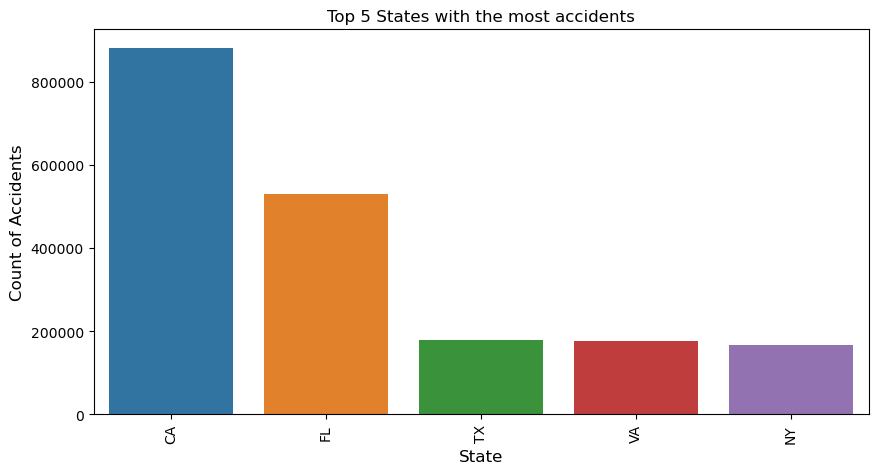

In [12]:
# getting the top 5 States with the most accidents

top_5_states = state_counts[:5]

plt.figure(figsize=(10,5))
sns.barplot(x=top_5_states.index, y=top_5_states.values, alpha=1)
plt.title('Top 5 States with the most accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### `Top 5 States with the most Accidents`

While Orlando holds two of the highest counts of the cities, We can clearly see that California does in fact have the highest count of car accidents. This is a good way to see which state has the highest amount of accidents regardless of the City. The Insurance company could use this data to adjust their rates accordingly.

### Plotting the Amount of Accidents by Year 

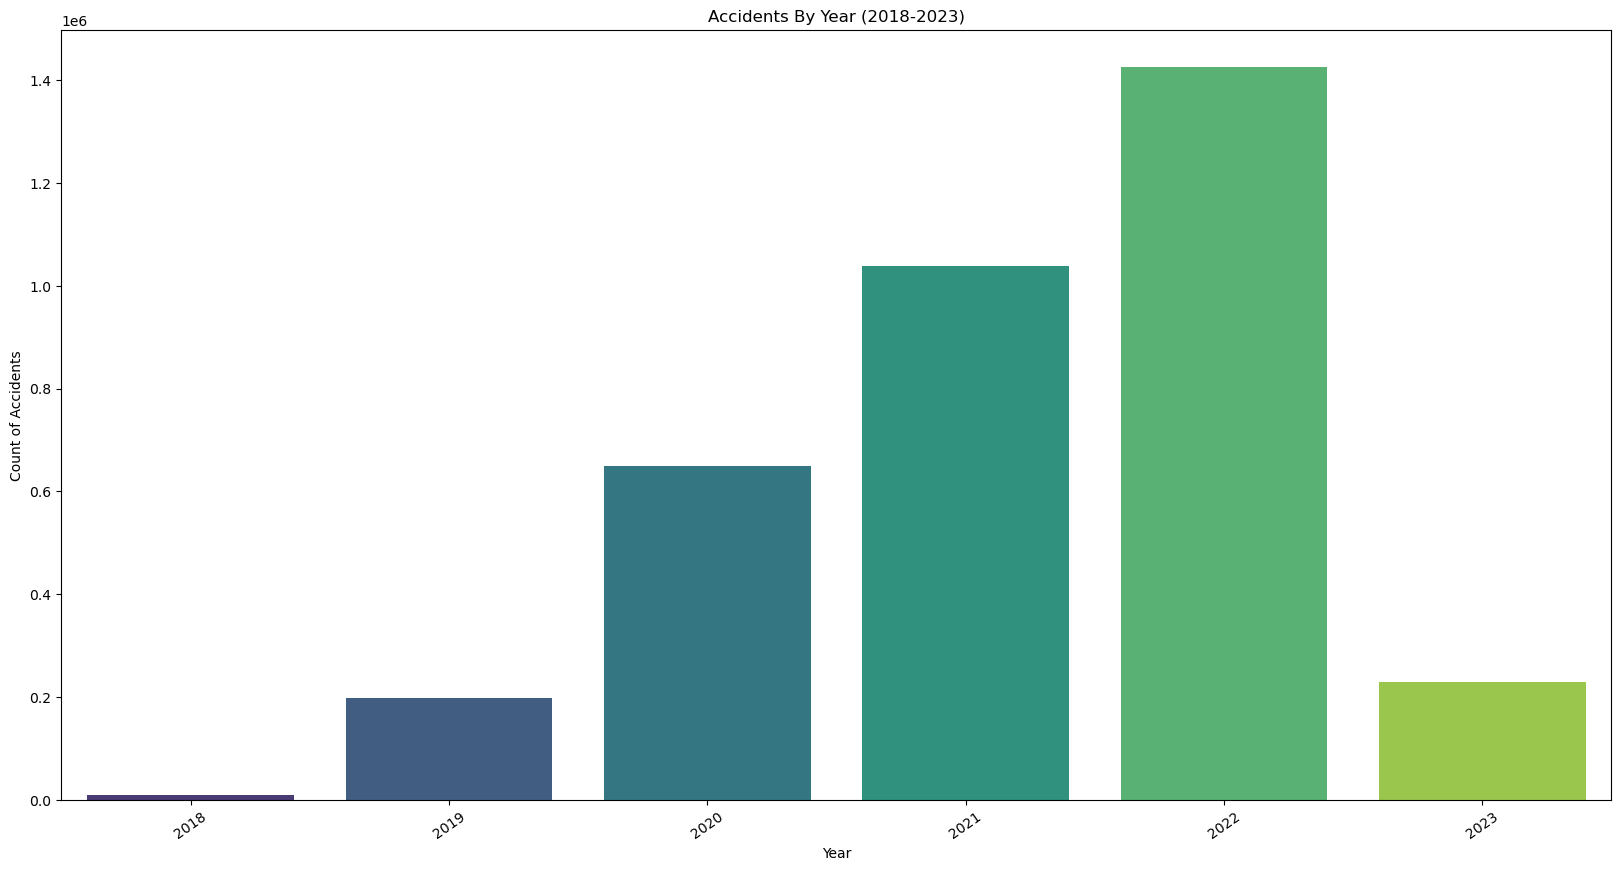

In [36]:
# Creating a histogram of the accidents by year using Seaborn
df['Year'] = df['Start_Time'].dt.year
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='Year', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.title('Accidents By Year (2018-2023)')
plt.xticks(rotation=35)
plt.show()


#### We only have data going up until March of 2023, We can either drop the data or keep it, because we are looking for variables that are correlated with the severity of the accident and date, doesn't matter as much as time of day.

#### Severity Count of Accidents by Year 

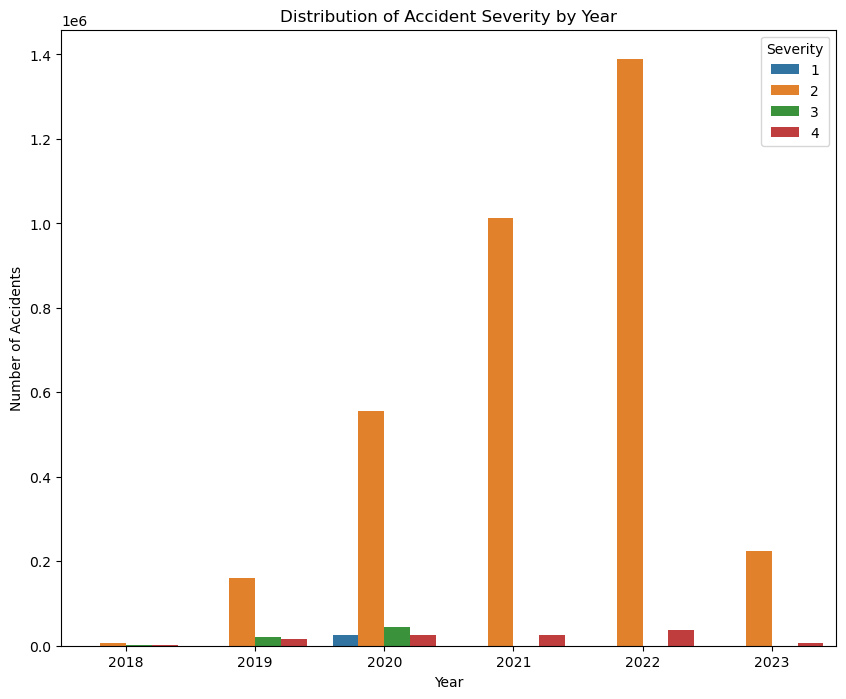

In [41]:
# Ensure 'Year' column exists by extracting it from another date column (if necessary)
if 'Year' not in df.columns:
    df['Year'] = df['Start_Time'].dt.year  # Assuming 'Start_Time' is the column with datetime values

# Plot
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Year', hue='Severity')
plt.title('Distribution of Accident Severity by Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()

#### `Take Aways`

We can see that from the charting, we can see that there is a heavy skew to the 2's. With that being said, as an insurance company if we had records of costs, we could also implement an average cost per accident. And doing some more mathmatical calculations, we could also figure out to see how much cash we need to have on hand to cover the costs of the accidents, and if our insurance policies costs are enough to cover the costs of the accidents.

### Getting the most common Weather Conditions at The Time of the Accident

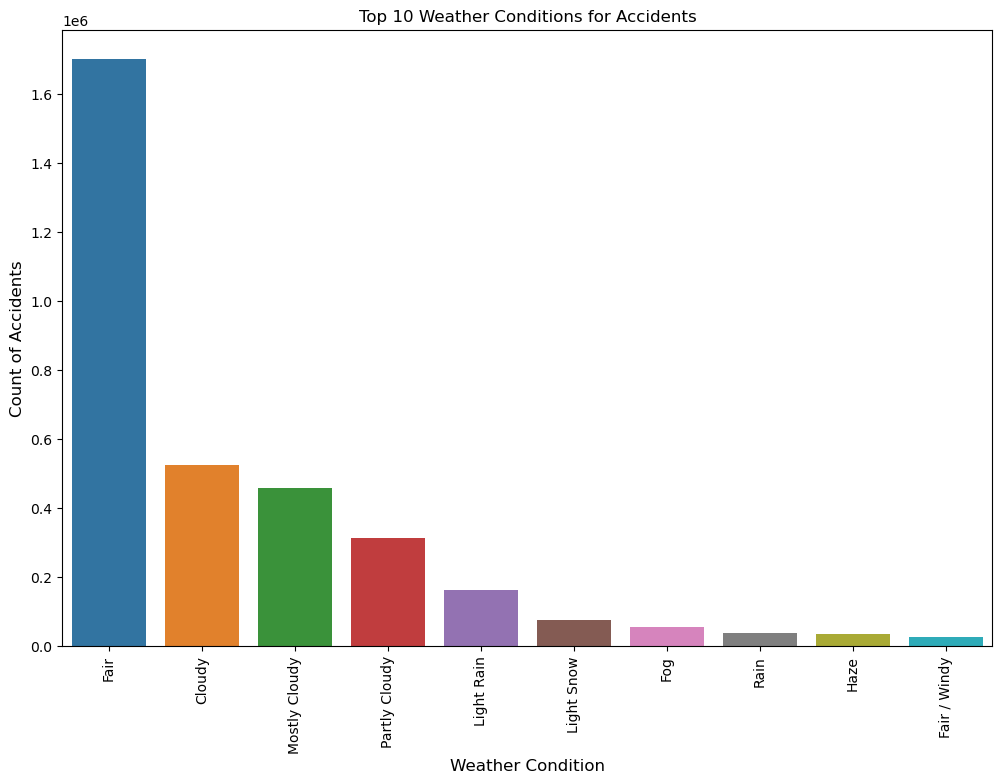

In [15]:
weather_conditions = df['Weather_Condition'].value_counts()[:10]
plt.figure(figsize=(12,8))
sns.barplot(x=weather_conditions.index, y=weather_conditions.values, alpha=1)
plt.title('Top 10 Weather Conditions for Accidents')
plt.ylabel('Count of Accidents', fontsize=12)
plt.xlabel('Weather Condition', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Modeling the data  


#### Getting Mean, Median, Standard Deviation, Variance of the Severity of Accidents

In [16]:
# getting the stats of the severity column
mean = df['Severity'].mean()
median = df['Severity'].median()
std_dev = df['Severity'].std()
variance = df['Severity'].var()

print(f'The mean of the severity column is {mean}')
print(f'The median of the severity column is {median}')
print(f'The standard deviation of the severity column is {std_dev}')
print(f'The variance of the severity column is {variance}')

The mean of the severity column is 2.073811105313826
The median of the severity column is 2.0
The standard deviation of the severity column is 0.3810629489479216
The variance of the severity column is 0.1452089710608863


#### `Explaining the Mean, Median, Standard Deviation, and Variance of the Severity of Accidents` 

- For the severity column, the average is around 2.07. This means that, on average, the severity level of an accident is just a bit above 2.
- The median is 2.0. This means that half of the accidents have a severity level below 2, and the other half have a severity level above 2.
- A standard deviation of 0.38 for the severity column suggests that most accidents have a severity level that is within 0.38 units (either above or below) from the average severity level of 2.07. 
- The variance for the severity column is 0.145. This number is always non-negative, and a variance of zero would indicate that all values are identical. A higher variance indicates wider dispersion in the values.

#### Getting the KDE of the Severity of Accidents

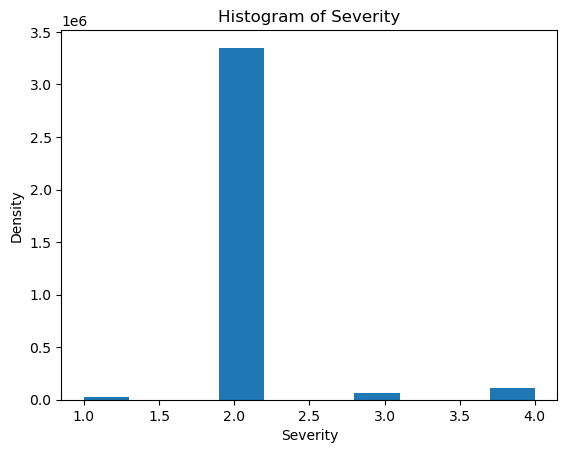

In [42]:
plt.hist(df['Severity'])
plt.title('Histogram of Severity')
plt.xlabel('Severity')
plt.ylabel('Density')
plt.plot;

## Data Manipluation

#### Changing some of the Values in the Data Frame to reduce the amount of unique values. By doing this, we are going to be making sure that our data frame is easier to compute. The less unique values the easier it is to compute, and along with that brings down our system requirements. In the next cells, we are going to be changing the values of the weather column. We are changing the values to be more broad, and to be able to group the values together.

In [44]:
weather_conditions = df['Weather_Condition'].unique()

print(weather_conditions)
print(len(weather_conditions))

['Overcast' 'Clear' 'Cloudy' 'Light Rain' 'Partly Cloudy' 'Light Snow'
 'Fair' 'Mostly Cloudy' 'Heavy Snow' 'Snow' 'Light Freezing Rain' 'Fog'
 'Mist' 'Light Freezing Fog' 'Cloudy / Windy' 'Blowing Snow' 'Haze' 'Rain'
 'Light Freezing Drizzle' 'Heavy Snow / Windy' 'Light Drizzle'
 'Heavy Drizzle' 'Drizzle' 'Light Ice Pellets' 'N/A Precipitation'
 'Fair / Windy' 'Scattered Clouds' 'Light Freezing Rain / Windy'
 'Wintry Mix' 'Heavy Rain' 'Light Thunderstorms and Rain'
 'Partly Cloudy / Windy' 'Light Rain Showers' 'Snow / Windy'
 'Heavy Thunderstorms with Small Hail' 'Heavy Thunderstorms and Rain'
 'Thunderstorms and Rain' 'Light Rain with Thunder' 'Light Rain / Windy'
 'Shallow Fog' 'Ice Pellets' 'Thunderstorm' 'Drizzle and Fog'
 'T-Storm / Windy' 'Thunder' 'Heavy T-Storm' 'Thunder in the Vicinity'
 'T-Storm' 'Smoke' 'Light Blowing Snow' 'Heavy Rain / Windy' 'Small Hail'
 'Rain / Windy' 'Light Drizzle / Windy' 'Light Snow / Windy'
 'Haze / Windy' 'Mostly Cloudy / Windy' 'Showers in the V

In [45]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

### Severity by Weather Condition


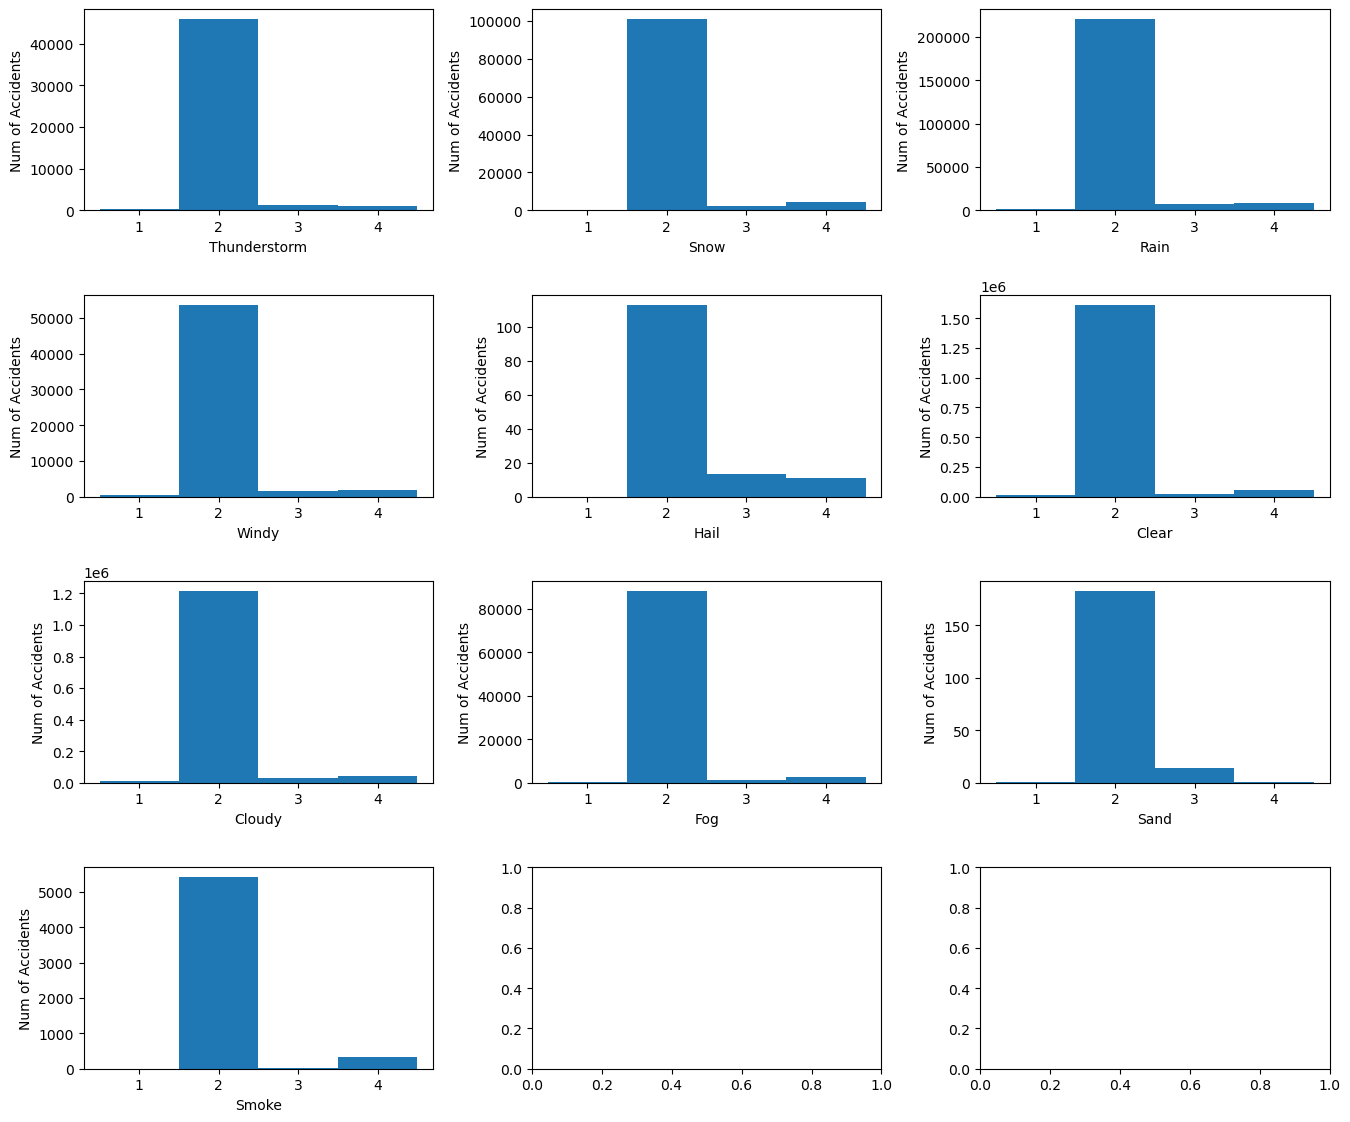

In [31]:
weather_types = ['Thunderstorm','Snow','Rain','Windy','Hail','Clear','Cloudy','Fog','Sand','Smoke']
fig, axes = plt.subplots(nrows=4,ncols=3,figsize=(14,12))
fig.tight_layout(pad = 4.0)

i = 0
for weather in weather_types:
    row = i // 3
    col = i % 3
    weatherdf = df[df['Weather_Condition'] == weather]
    axes[row,col].hist(weatherdf['Severity'],bins=4,range=[0.5,4.5])
    axes[row,col].set_xlabel(weather)
    axes[row,col].set_ylabel('Num of Accidents')
    i += 1
    
plt.show;


#### `Severity by Weather Condition`

We are able to see that the weather conditions that have the highest count of accidents are clear, overcast, and mostly cloudy. This is a good way to see what weather conditions have the highest count of accidents, and we can see that the weather conditions that have the highest count of accidents and are able to see the severity of the accidents on average.

### Counts of the Accidents by Weather Condition

C:\Users\user\AppData\Local\Temp\ipykernel_20172\1773640138.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  severityDF = severityDF[df['Weather_Condition'].isin(weather_types)]


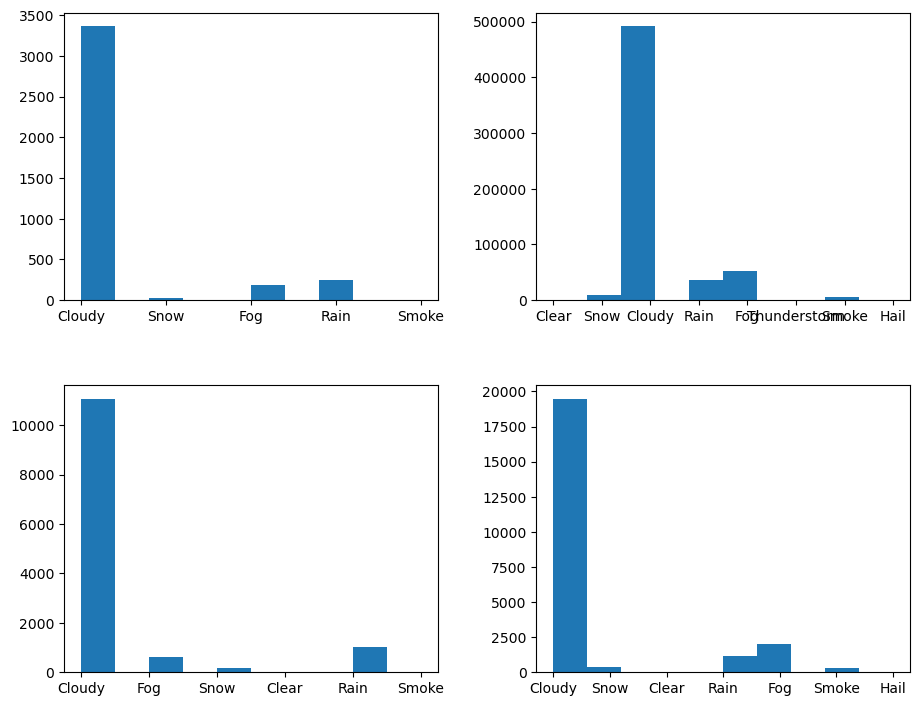

In [43]:
severity_levels = [1,2,3,4]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
fig.tight_layout(pad = 4.0)
weather_types = ['Thunderstorm','Snow','Rain','Windy','Hail','Clear','Cloudy','Fog','Sand','Smoke']

i = 0
for severity in severity_levels:
    row = i // 2
    col = i % 2
    severityDF = df[df['Severity'] == severity]
    severityDF = severityDF[df['Weather_Condition'].isin(weather_types)]
    axes[row,col].hist(severityDF['Weather_Condition'],bins = 10)
    i += 1
    
plt.show;

### Severity by Environmental Features

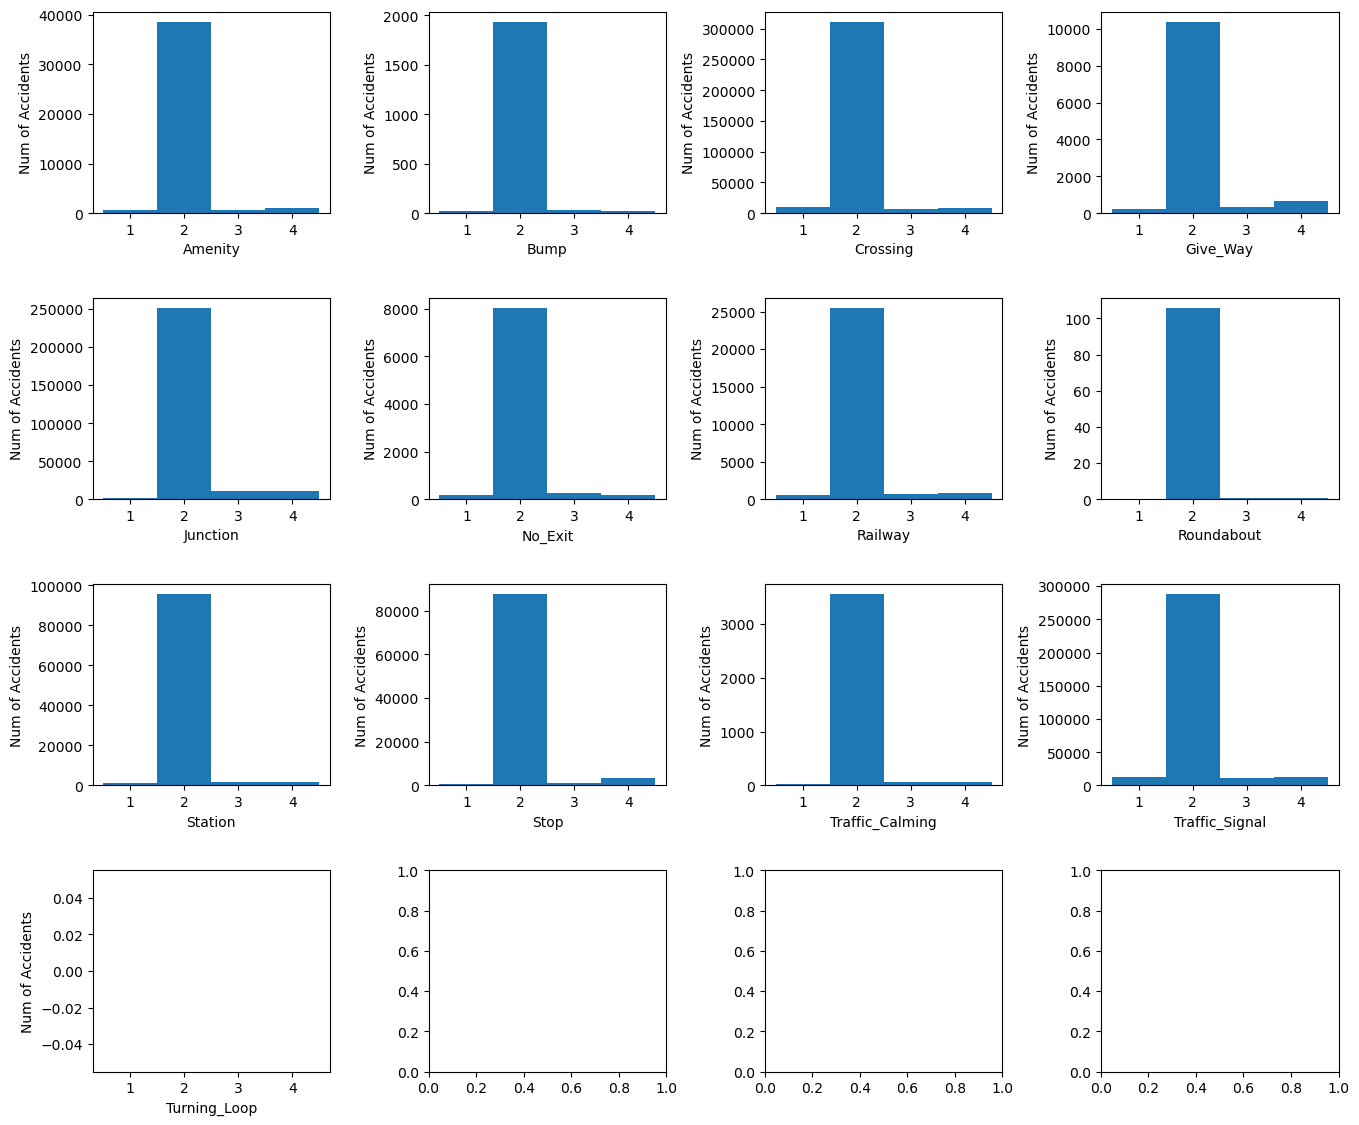

In [32]:
environmentalFeatures = ['Turning_Loop','Traffic_Signal','Traffic_Calming','Stop','Station','Roundabout','Railway','No_Exit','Junction','Give_Way','Crossing','Bump','Amenity']
environmentalFeatures =  environmentalFeatures[::-1]
fig, axes = plt.subplots(nrows=4,ncols=4,figsize=(14,12))
fig.tight_layout(pad = 4.0)

i = 0
for environmentFeature in environmentalFeatures:
    row = i // 4
    col = i % 4
    envFeatdf = df[df[environmentFeature] == 1]
    axes[row,col].hist(envFeatdf['Severity'],bins=4,range=[0.5,4.5])
    axes[row,col].set_xlabel(environmentFeature)
    axes[row,col].set_ylabel('Num of Accidents')
    i += 1
    
plt.show;

#### `Severity by Environmental Features`

By looking at the chart, we can see that the environmental features that have the highest count of accidents are traffic signals, junctions, and crossings. This is a good way to see what environmental features have the highest count of accidents, and we can see that the environmental features that have the highest count of accidents and are able to see the severity of the accidents on average.

### Counts of the Accidents by Environmental Features

C:\Users\elanw\AppData\Local\Temp\ipykernel_24848\2145577616.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[row,col].set_xticklabels(labels, rotation=90)


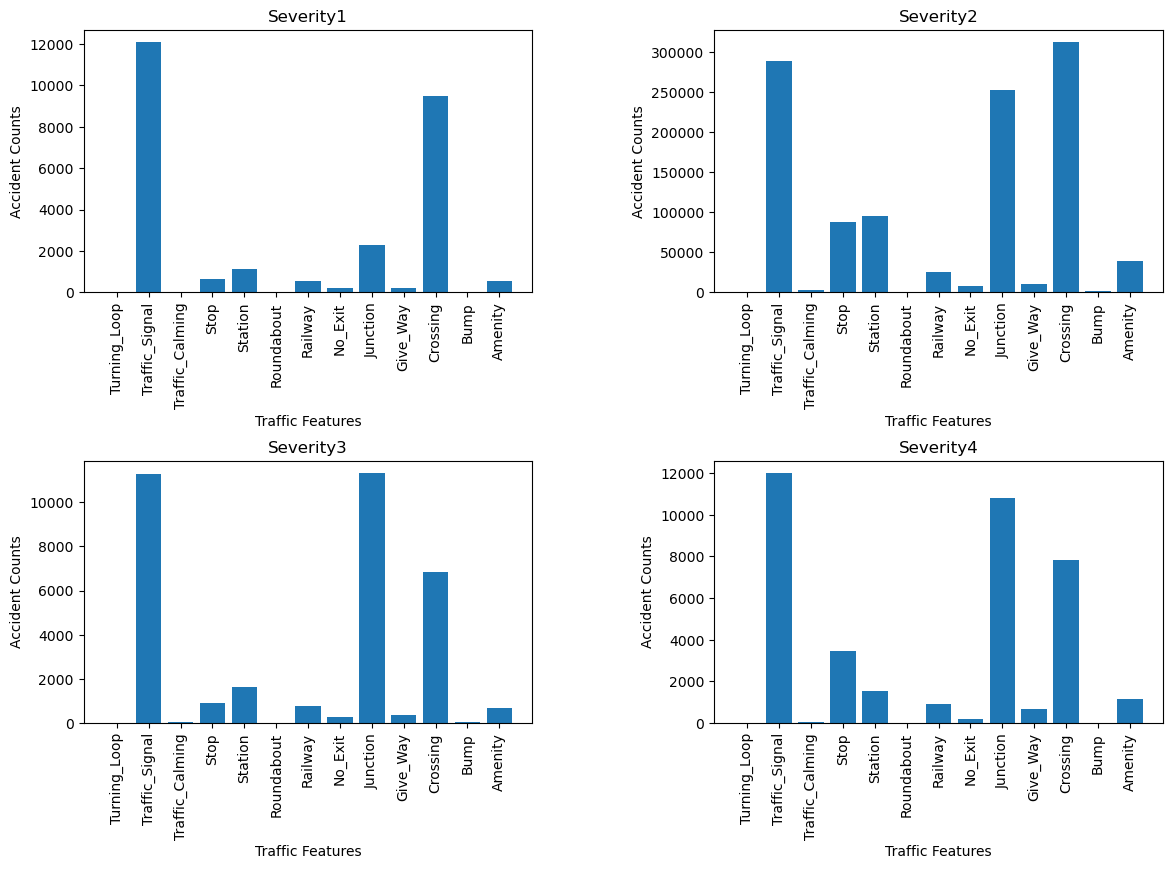

In [114]:
severity_levels = [1,2,3,4]

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14,10))
fig.tight_layout(pad = 10.0)

i = 0
for severity in severity_levels:
    row = i // 2
    col = i % 2
    severityDF = df[df['Severity'] == severity]
    labels = ['Turning_Loop','Traffic_Signal','Traffic_Calming','Stop','Station','Roundabout','Railway','No_Exit','Junction','Give_Way','Crossing','Bump','Amenity']
    vals = []
    for label in labels:
        vals.append(severityDF[label].sum())
    axes[row,col].bar(labels,vals)
    axes[row,col].set_xticklabels(labels, rotation=90)
    axes[row,col].set_xlabel('Traffic Features')
    axes[row,col].set_ylabel('Accident Counts')
    axes[row,col].set_title(('Severity' + str(severity)))

    i += 1

plt.plot();

### Checking the Wind Direction And Changing the Values to be more Broad

In [46]:
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

df["Wind_Direction"].unique()

array(['NW', 'Calm', 'N', 'Variable', 'SW', 'S', 'NE', 'W', 'SE', 'E'],
      dtype=object)

# Section 4: Model Selection 

## `Classification Model`

Our group decided to use the classification model for the accidents data set, because we are attempting to predict the severity of the Car accident. As a Insurance company, if we get some of the input features that lead up to the accident, we could predict the average costs that we will need to pay out. We are not trying to figure out the accident happened, but we are attempting to predict the severity of the accident, and after that producing a cost estimate. But that would be something that could be done in the future. 


#### We are going to start with the `Classification Model` and see how it performs.

In [47]:
# importing all of the libraries needed for the Classification and log from sklearn to predict the severity column

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## `Classification Model Creation`

#### Dropping all unneeded columns, and changing the data types of the columns to make the computation easier, and faster

In [48]:
# Dropping na values from the df
df = df.dropna()

# Printing all of the headers to see what we have to work with

print(df.columns)

# Printing the data types of the columns 

print(df.dtypes)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'State',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Year', 'Month', 'Weekday', 'Day',
       'Hour', 'Minute'],
      dtype='object')
ID                           object
Source                       object
Severity                      int64
Start_Time           datetime64[ns]
End_Time                     object
Start_Lat                   float64
Start_Lng                   float64
End_Lat                     float64
End_Lng                     float64
Distance(mi)              

### Changing all of the Float values to Integers, and droppoing all objects and datetimes

In [52]:
# changing the data type of the data types from floats to ints 

for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = np.round(df[col]).astype('int64')

# Dropping all objects from the df 
df = df.select_dtypes(exclude=['object'])
df = df.select_dtypes(exclude=['datetime64[ns]'])

# Printing the data types of the columns to verify 
print(df.dtypes)

Severity             int64
Start_Lat            int64
Start_Lng            int64
End_Lat              int64
End_Lng              int64
Distance(mi)         int64
Temperature(F)       int64
Wind_Chill(F)        int64
Humidity(%)          int64
Pressure(in)         int64
Visibility(mi)       int64
Wind_Speed(mph)      int64
Precipitation(in)    int64
Amenity              int64
Bump                 int64
Crossing             int64
Give_Way             int64
Junction             int64
No_Exit              int64
Railway              int64
Roundabout           int64
Station              int64
Stop                 int64
Traffic_Calming      int64
Traffic_Signal       int64
Turning_Loop         int64
Year                 int64
Month                int64
Weekday              int64
Day                  int64
Hour                 int64
Minute               int64
dtype: object


## `Creating the Models Data Frames`

#### Dropping the Severity Column from the Data Frame, and creating the X and Y Data Frames

In [53]:
# splitting the data into features and target

X = df.drop('Severity', axis=1)  # Features
y = df['Severity']               # Target


#### `Creating the training and testing data frames for the model`

- Doing this allows us to make sure that we are not overfitting the model, and we are able to get a good accuracy score on the model. 
- This is also needed to make sure that we are testing on correct and properly formated data, before applying the model to live real world data.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### `Standardizing the Data`

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### `Training the model`

In [56]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### `Testing The Accuracy of the Model`

In [57]:
y_pred = clf.predict(X_test)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print Classification Report
print(classification_report(y_test, y_pred))

Accuracy: 0.9526
              precision    recall  f1-score   support

           1       0.81      0.62      0.70      5076
           2       0.97      0.99      0.98    669374
           3       0.77      0.59      0.67     13292
           4       0.41      0.25      0.31     22068

    accuracy                           0.95    709810
   macro avg       0.74      0.61      0.66    709810
weighted avg       0.94      0.95      0.95    709810



### `Explaining the Classification Report`

- The model has an overall accuracy of about 95.26%.

- The model is best at predicting class 2 with high precision (97%) and recall (99%).

- Class 4 is the most challenging for the model to predict, with the lowest precision (41%) and recall (25%).

- On average, when considering each class equally (macro avg), the model has a precision of 74%, a recall of 61%, and an F1-score of 66%.

- When considering the size of each class (weighted avg), the model's precision, recall, and F1-score are all around 95%.



# Section 5: Model Evaluation And Analysis

#### `Confusion Matrix`

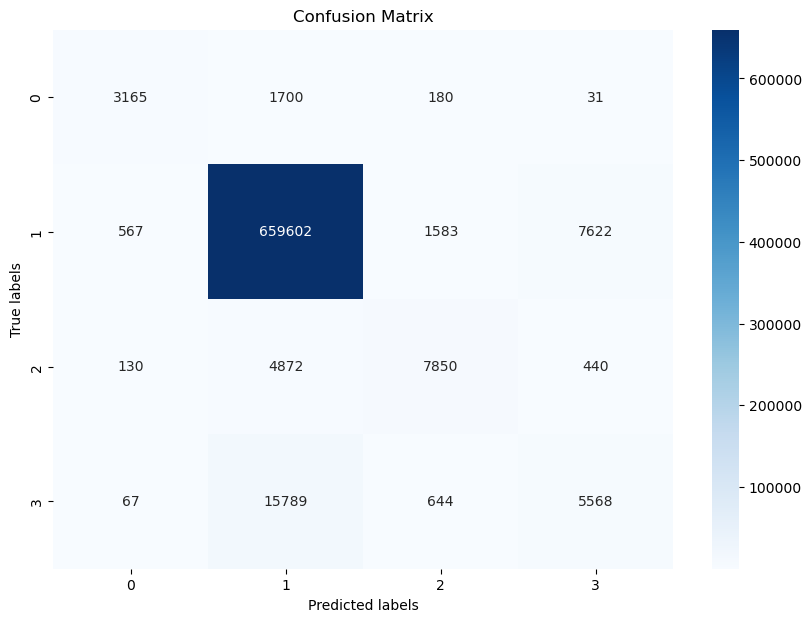

In [58]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Confusion Matrix Explained

- The confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

- The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

- The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

- It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

- It is this breakdown that overcomes the limitation of using classification accuracy alone.

### `Balanced Accuracy Score`

In [59]:
from sklearn.metrics import balanced_accuracy_score

bal_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {bal_accuracy:.4f}")


Balanced Accuracy: 0.6130


Balanced Accuracy addresses this issue by taking the arithmetic mean of sensitivity (true positive rate)

$Balanced Accuracy = \frac{1}{2} (Sensitivity + Specificity)$

#### `ROC Curve`

An ROC Curve 

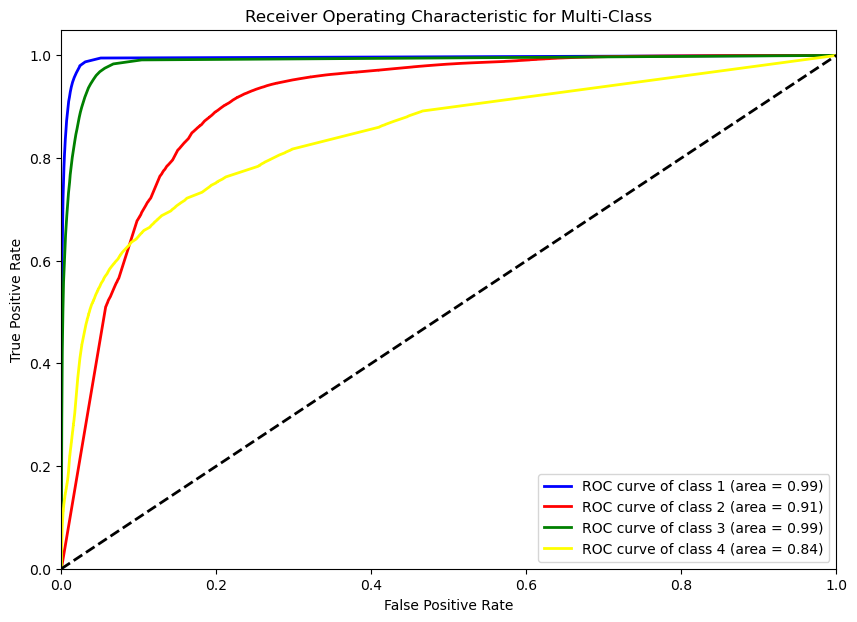

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Get the predicted probabilities
y_score = clf.predict_proba(X_test)

# Binarize the output (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 7))
colors = ['blue', 'red', 'green', 'yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

#### `Precision Score`

In [61]:
from sklearn.metrics import precision_score

# Compute precision for each class
precisions = precision_score(y_test, y_pred, average=None)

# Print precision for each class
for i, precision in enumerate(precisions, 1):
    print(f"Precision for class {i}: {precision:.4f}")

weighted_precision = precision_score(y_test, y_pred, average='weighted')
print(f"Weighted Average Precision: {weighted_precision:.4f}")


Precision for class 1: 0.8055
Precision for class 2: 0.9672
Precision for class 3: 0.7653
Precision for class 4: 0.4076
Weighted Average Precision: 0.9449


# Section 6: Conclusion and Recommendations